## Assignment 2 - Building a Crowdsourced Recommender System

Team Members:
- Abigail Peck (ap69393)
- Emily Caraher (ec45335)
- Nandini Anand Kumar (na29337)
- Riju Hariharan (rh42988)
- Sarvesh Miskin (sm88728)
- Varsha Ramesh (vr23656)

High level description: The objective of this group assignment is to create the building blocks of a
crowdsourced recommender system. It should accept user inputs in the form of desired attributes of a
product and come up with 3 recommendations.\
Obtain reviews of craft beers from beeradvocate.com. I would suggest using the following link, which
shows the top 250 beers sorted by ratings:
https://www.beeradvocate.com/beer/top-rated/ \
However, you can scrape 8-10k reviews (must be around 250 beers) from any other website.\
The nice feature of the above link is that it is a single-page listing of 250 top-rated beers (avoids the
pagination feature, which you need in cases where listings go on for many pages). The way
beeradvocate.com organizes reviews is that it provides about 25 reviews per page. The output file
should have 3 columns: product_name, product_review, and user_rating.

### Task A
Extract 8-10k reviews. However, many reviews may not have any text and will therefore be
discarded. So be prepared to scrape a lot of pages of reviews per beer. Beeradvocate.com requires you
to log in to read reviews beyond the first page.

In [21]:
import sys;
import pandas as pd
import re
!{sys.executable} -m pip install -U spacy 
!{sys.executable} -m spacy download en_core_web_md
!pip install -U spacy
!pip install spacy
!pip install scikit-learn pandas nltk gensim spacy

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     --------- ------------------------------ 7.9/33.5 MB 48.7 MB/s eta 0:00:01
     ------------------------- ------------- 21.8/33.5 MB 59.9 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 64.0 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 64.0 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 64.0 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 64.0 MB/s eta 0:00:01
     --------------------------------------  33.3/33.5 MB 64.0 MB/s eta 0:00:01
     ---------------------------------------- 33.5/33.5 MB 22.4 MB/s  0:00:01
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


C:\Users\kevin\anaconda3\envs\tf\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Scrapper Code

In [22]:
# import requests
# from bs4 import BeautifulSoup
# import csv
# import time
# import random

# # Constants
# BASE_URL = "https://www.beeradvocate.com"
# TOP_BEERS_URL = f"{BASE_URL}/beer/top-rated/"
# HEADERS = {
#     "User-Agent": "Mozilla/5.0 (compatible; BeerReviewBot/1.0)",
# }

# SESSION = requests.Session()
# SESSION.headers.update(HEADERS)

# OUTPUT_FILE = "beer_reviews.csv"

# # Set both login-related cookies (these must be valid for your session)
# SESSION.cookies.set("xf_session", "2b8c5398daa62454fceea8c73cf48fd8", domain=".beeradvocate.com")
# SESSION.cookies.set("xf_user", "1374486%2C96be6cdc9d7667d9261a6f54032a241bc4417c99", domain=".beeradvocate.com")

# def get_soup(url):
#     print(f"Fetching: {url}")
#     res = SESSION.get(url)
#     res.raise_for_status()
#     return BeautifulSoup(res.text, 'html.parser')

# def get_top_beer_links():
#     soup = get_soup(TOP_BEERS_URL)
#     links = []

#     for tag in soup.select("a[href^='/beer/profile/']"):
#         href = tag.get("href")
#         if href.startswith("/beer/profile/") and len(href.split("/")) == 6:
#             full_url = BASE_URL + href.rstrip("/")
#             if full_url not in links:
#                 links.append(full_url)

#     print(f"Found {len(links)} beer links.")
#     return links

# def parse_reviews(beer_url, max_pages=10):
#     reviews = []
#     for offset in range(0, max_pages * 25, 25):
#         paginated_url = f"{beer_url}/?view=beer&sort=&start={offset}"
#         soup = get_soup(paginated_url)

#         # Get beer name from the <title> tag
#         page_title = soup.title.string if soup.title else ""
#         if " | " in page_title:
#             parts = page_title.split(" | ")
#             product_name = parts[0].strip()
#         else:
#             product_name = "Unknown"

#         review_blocks = soup.select("div.user-comment")
#         if not review_blocks:
#             print("No more reviews or login required.")
#             break

#         for block in review_blocks:
#             # Get review text first
#             review_text_tag = block.select_one("#rating_fullview_content_2 > div[style*='font-size']")
#             product_review = review_text_tag.get_text(strip=True) if review_text_tag else ""

#             # Skip if there's no review text
#             if not product_review:
#                 continue

#             # Get user rating (from .BAscore_norm)
#             rating_tag = block.select_one("span.BAscore_norm")
#             user_rating = rating_tag.text.strip() if rating_tag else "N/A"

#             # Add review tuple
#             reviews.append((product_name, product_review, user_rating))

#         time.sleep(random.uniform(1.5, 3))  # polite rate limiting
#     return reviews

# def scrape_all_beers(max_beers=250):
#     all_reviews = []
#     beer_links = get_top_beer_links()[:max_beers]
#     for idx, beer_url in enumerate(beer_links):
#         print(f"\n[{idx+1}/{len(beer_links)}] Scraping: {beer_url}")
#         beer_reviews = parse_reviews(beer_url, max_pages=10)
#         all_reviews.extend(beer_reviews)
#         print(f"Collected {len(beer_reviews)} reviews from this beer.")
#         print(f"Total collected so far: {len(all_reviews)} reviews.")
#         if len(all_reviews) >= 10000:
#             break
#     return all_reviews[:10000]

# def save_to_csv(data, filename=OUTPUT_FILE):
#     with open(filename, "w", newline="", encoding="utf-8") as f:
#         writer = csv.writer(f)
#         writer.writerow(["product_name", "product_review", "user_rating"])
#         writer.writerows(data)
#     print(f"Saved {len(data)} reviews to {filename}")

# if __name__ == "__main__":
#     all_reviews = scrape_all_beers()
#     save_to_csv(all_reviews)


Code above was used for scraping, but commented out because it needed to be run in Jupyter Notebook to avoid Colab scraping detection. File generated used in cells that follow.

### Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes
in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes
from the actual data like you did for the first assignment)\
https://www.dummies.com/food-drink/drinks/beer/beer-for-dummies-cheat-sheet/
- Aggressive (Boldly assertive aroma and/or taste)
- Balanced: Malt and hops in similar proportions; equal representation of malt sweetness and
hop bitterness in the flavor — especially at the finish
- Complex: Multidimensional; many flavors and sensations on the palate
- Crisp: Highly carbonated; effervescent
- Fruity: Flavors reminiscent of various fruits or Hoppy: Herbal, earthy, spicy, or citric aromas and
flavors of hops or Malty: Grainy, caramel-like; can be sweet or dry
- Robust: Rich and full-bodied

Use the above attributes as examples only, for a word frequency analysis of beer reviews is a better way
to find important attributes in the actual data. Also to make sure that attributes you specify are likely to
be co-mentioned in a review, a lift analysis may be helpful.\
Assume that a customer has specified 3 attributes of the product as being important to him or her.
Recommend 3 beers using a bag-of-words model with cosine similarity and sentiment analysis. Explain
your method in detail (in words!).\
Show a table showing your three final recommendations along with 20 other top contenders so that I
can understand how the top three got chosen.

#### Explanation of the logic

*   We load and standardize the beer reviews, apply light text normalization, and aggregate all reviews per beer to form a single document per item.
*   We look for our target words (like sweet, smooth, rich) and the short phrases around them (e.g., “very smooth,” “too sweet”).
*   Attribute sentiment is computed per review with a rules-first approach and a windowed, sign-only VADER fallback, then averaged per attribute and per beer and normalized to [0,1].
*   A unified scoring functional combines normalized similarity (weight 0.6), feature sentiment (0.25), and normalized rating (0.15), and then modulates the result by the support factor.
*  Tasks B/C/D differ only in the similarity module—BoW cosine on counts, spaCy pretrained embeddings, and custom Word2Vec trained on the corpus—permitting a controlled comparison of representations while holding the decision policy fixed.

In [23]:
# =======================
# COMMON SETUP for Task B, C and D
# =======================
import re, numpy as np, pandas as pd
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', quiet=True)

# --------- CONFIG ----------
CSV_PATH = "beer_reviews.csv"
ATTRS    = ["sweet","smooth","rich"]       # attributes
W_SIM, W_SENT, W_RATE = 0.6, 0.25, 0.15    # final score weights
TOK = re.compile(r"[a-z']+")               # light tokenizer

# --------- LOAD + BASIC CLEAN ----------
df_raw = pd.read_csv(CSV_PATH)
lc = {c.lower(): c for c in df_raw.columns}
name_col   = lc.get("product_name", list(df_raw.columns)[0])
review_col = lc.get("product_review", list(df_raw.columns)[1])
rating_col = lc.get("user_rating", None)

df = df_raw[[name_col, review_col] + ([rating_col] if rating_col else [])].copy()
df.columns = ["product_name", "product_review"] + (["user_rating"] if rating_col else [])
df["product_review"] = df["product_review"].fillna("").astype(str)
df["user_rating_num"] = pd.to_numeric(df["user_rating"], errors="coerce") if "user_rating" in df.columns else np.nan

# basic cleaned text for BoW/embeddings (keeps apostrophes; splits hyphens)
def clean_light(s: str) -> str:
    s = s.lower().replace("-", " ")
    s = re.sub(r"[^a-z0-9'\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["_clean"] = df["product_review"].apply(clean_light)

# aggregate per beer
beer_docs   = df.groupby("product_name")["_clean"].apply(lambda s: " ".join(s)).to_dict()
beers       = list(beer_docs.keys())
beer_texts  = [beer_docs[b] for b in beers]

# ratings
avg_rating = (df.groupby("product_name")["user_rating_num"].mean()
                .reindex(beers).astype(float))
if np.isfinite(avg_rating.min()):
    avg_rating = avg_rating.fillna(avg_rating.min())
else:
    avg_rating = avg_rating.fillna(0.0)

# --------- ATTR PHRASE MINER --------
def attr_collocations(text, attr):
    toks, out = TOK.findall(text.lower()), []
    for i, w in enumerate(toks):
        if w != attr: continue
        if i-1 >= 0: out.append(f"{toks[i-1]} {attr}")
        if i+1 < len(toks): out.append(f"{attr} {toks[i+1]}")
        if i-1 >= 0 and i+1 < len(toks): out.append(f"{toks[i-1]} {attr} {toks[i+1]}")
    return out

def mine_attr_phrases(df, attr, min_count=5, topn=20):
    cnt = Counter()
    for tx in df["product_review"].astype(str):
        cnt.update(attr_collocations(tx, attr))
    items = [(p, c) for p, c in cnt.items() if c >= min_count]
    sia = SentimentIntensityAnalyzer()

    def hard_neg(p):
        if attr == "sweet":  return bool(re.search(r"\b(cloying|overly|too|excessively|sickly)\s+sweet\b", p))
        if attr == "smooth": return bool(re.search(r"\bnot\s+smooth\b|\bharsh\b|\bastringent\b|\brough\b", p))
        if attr == "rich":   return bool(re.search(r"\bnot\s+rich\b|\bthin\b|\bwatery\b|\bweak\b|\bdilute(d)?\b|\blacks?\s+body\b", p))
        return False

    def hard_pos(p):
        if attr == "smooth":
            return bool(re.search(r"\b(very|so|super|ultra|really|incredibly|exceptionally)\s+smooth\b", p) or
                        re.search(r"\b(silky|creamy|velvety|buttery)\s+smooth\b", p) or
                        re.search(r"\bsmooth\s+and\s+(silky|creamy|velvety|buttery)\b", p))
        if attr == "rich":
            return bool(re.search(r"\b(very|so|super|ultra|really|incredibly|exceptionally)\s+rich\b", p) or
                        re.search(r"\brich\s+(and\s+)?(creamy|chocolate(y)?|malty|complex)\b", p) or
                        re.search(r"\bfull\s*bod(ied|y)\b|\bdecadent\b|\brobust\b|\bthick\b|\bchewy\b", p))
        if attr == "sweet":
            return bool(re.search(r"\b(pleasantly|subtly)\s+sweet\b|\bbalanced\s+sweet(ness)?\b", p))
        return False

    scored = []
    for (p, c) in items:
        s = sia.polarity_scores(p)["compound"]
        if hard_neg(p): s = -1.0
        elif hard_pos(p): s = +0.8
        scored.append((p, c, s))

    scored.sort(key=lambda x: (x[1], abs(x[2])), reverse=True)
    pos = [p for (p, c, s) in scored if s >= 0.4][:topn]
    neg = [p for (p, c, s) in scored if s <= -0.4][:topn]
    neg_strong = [p for (p, c, s) in scored if s <= -0.7][:topn//2]
    return {"pos": pos, "neg": neg, "neg_strong": neg_strong, "scored": scored[:50]}

mined = {a: mine_attr_phrases(df, a, min_count=5, topn=20) for a in ATTRS}

def regexify(phrase: str):
    return r"\b" + re.sub(r"\s+", r"\\s+", re.escape(phrase)) + r"\b"

# --------- BASE RULES + EXPANSION ----------
RULES = {
    "sweet": {
        "neg_strong":[r"\bcloying\b",r"\btoo\s+sweet\b",r"\boverly\s+sweet\b",r"\b(sickly|excessively)\s+sweet\b"],
        "neg":[r"\bnot\s+sweet\b",r"\bartificial(ly)?\s+sweet\b",r"\bsyrupy\b",r"\blacks?\s+sweet(ness)?\b"],
        "pos":[r"\bpleasantly\s+sweet\b",r"\bsubtly\s+sweet\b",r"\bbalanced\s+sweet(ness)?\b"]
    },
    "smooth": {
        "neg_strong":[r"\bnot\s+smooth\b",r"\bharsh\b",r"\bastringent\b",r"\brough\b"],
        "neg":[r"\bthin\b",r"\bsharp\b"],
        "pos":[r"\bsilky\b",r"\bcreamy\b",r"\bvelvety\b",r"\bbuttery\b",
               r"\b(very|so|super|ultra|really|incredibly|exceptionally)\s+smooth\b",
               r"\b(silky|creamy|velvety|buttery)\s+smooth\b",
               r"\bsmooth\s+and\s+(silky|creamy|velvety|buttery)\b"]
    },
    "rich": {
        "neg_strong":[r"\bnot\s+rich\b",r"\bthin\b",r"\bwatery\b",r"\bweak\b",r"\bdilute(d)?\b",r"\blacks?\s+body\b"],
        "neg":[r"\blight\s*bod(ied|y)\b",r"\bflat\s+body\b"],
        "pos":[r"\brich\b",r"\bfull\s*bod(ied|y)\b",r"\bdecadent\b",r"\brobust\b",r"\bthick\b",r"\bchewy\b",
               r"\b(very|so|super|ultra|really|incredibly|exceptionally)\s+rich\b",
               r"\brich\s+(and\s+)?(creamy|chocolate(y)?|malty|complex)\b"]
    }
}
for a in ATTRS:
    for k in ["pos","neg","neg_strong"]:
        RULES[a][k] = list(dict.fromkeys(RULES[a][k] + [regexify(p) for p in mined[a][k]]))

# --------- ATTRIBUTE SENTIMENT  ----------
sia = SentimentIntensityAnalyzer()

def window_tokens(text): return TOK.findall(text.lower())
def window_text(text, center_idx, win=6):
    toks = window_tokens(text); L = max(0, center_idx-win); R = min(len(toks), center_idx+win+1)
    return " ".join(toks[L:R])
def attribute_positions(text, attr):
    toks = window_tokens(text); return [i for i,w in enumerate(toks) if w == attr]

def score_attr_in_text(text, attr, win=6):
    pos_idx = attribute_positions(text, attr)
    if not pos_idx: return None
    t, patt = text.lower(), RULES[attr]
    for rx in patt["neg_strong"]:
        if re.search(rx, t): return -1.0
    for rx in patt["pos"]:
        if re.search(rx, t): return +1.0
    for rx in patt["neg"]:
        if re.search(rx, t): return -0.6
    # fallback: binary sign of VADER in the window
    scores = []
    for i in pos_idx:
        c = sia.polarity_scores(window_text(text, i, win))["compound"]
        scores.append(+0.5 if c >= 0 else -0.5)
    return float(np.mean(scores)) if scores else -0.5

def beer_attribute_sentiment(df, attr):
    vals, names = [], []
    for name, grp in df.groupby("product_name"):
        per = []
        for txt in grp["product_review"].astype(str):
            s = score_attr_in_text(txt, attr)
            if s is not None: per.append(max(-1.0, min(1.0, s)))
        names.append(name); vals.append(np.mean(per) if per else np.nan)
    return pd.Series(vals, index=names, name=f"{attr}_sent")

sent_series   = [beer_attribute_sentiment(df, a) for a in ATTRS]
feature_sent  = pd.concat(sent_series, axis=1).mean(axis=1, skipna=True)       # [-1..+1]
feature_sentN = ((feature_sent + 1.0) / 2.0).reindex(beers).fillna(0.0).values # [0..1]

# --------- SOFT EVIDENCE SUPPORT ----------
SMOOTH_SYNS = r"(silky|creamy|velvety|buttery)"
RICH_SYNS   = r"(full\s*bod(?:ied|y)|decadent|robust|thick|chewy|richness)"
def mentions_any_attr_or_phrase(t):
    t = t.lower()
    for a in ATTRS:
        if re.search(rf"(?<![a-z]){re.escape(a)}(?![a-z])", t): return True
        for p in (mined[a]["pos"] + mined[a]["neg"] + mined[a]["neg_strong"]):
            if re.search(regexify(p), t): return True
    if re.search(SMOOTH_SYNS, t): return True
    if re.search(RICH_SYNS,   t): return True
    return False

support_hits = (df.assign(hit=df["product_review"].apply(mentions_any_attr_or_phrase))
                  .groupby("product_name")["hit"].sum()
                  .reindex(beers).fillna(0).astype(int).values)
support_factor = np.clip(support_hits / 20.0, 0, 1.0)  # saturate near 20 mentions

# --------- UTIL: normalizer + final rank  ----------
def norm01(x):
    x = np.asarray(x, float); mn, mx = np.nanmin(x), np.nanmax(x)
    x = np.nan_to_num(x, nan=mn if np.isfinite(mn) else 0.0)
    return (x - mn) / (mx - mn + 1e-9)

def rank_from_similarity(sim_vec, label_sim_column):
    S = norm01(sim_vec)                 # similarity 0..1
    F = feature_sentN                   # already 0..1
    R = norm01(avg_rating.values)       # 0..1
    base = W_SIM*S + W_SENT*F + W_RATE*R
    final = base * (0.7 + 0.3*support_factor)
    order = np.argsort(-final)
    return pd.DataFrame({
        "beer": [beers[i] for i in order],
        "score": np.round(final[order], 3),
        label_sim_column: np.round(S[order], 3),
        "feature_sentiment": np.round(F[order], 3),
        "avg_rating_norm":  np.round(R[order], 3),
        "support_hits": support_hits[order]
    })


**Bag of Words:** Represent each beer (and the “sweet smooth rich” query) with bag-of-words, compute cosine similarity, also compute an attribute lift matrix across reviews, then rank with the shared scorer.

In [24]:
# =======================
# TASK B – BOW BASELINE
# =======================

# (B1) WORD FREQUENCIES (top 50)
vec_freq = CountVectorizer(stop_words="english")
X_freq   = vec_freq.fit_transform(df["_clean"])
freq = pd.Series(X_freq.sum(axis=0).A1, index=vec_freq.get_feature_names_out()).sort_values(ascending=False)
print(freq.head(50))

# (B2) ATTRIBUTE LIFT among reviews
attrs = [a.lower() for a in ATTRS]
for a in attrs:
    pat = rf"\b{re.escape(a)}\b"
    df[a] = df["_clean"].str.contains(pat, case=False, regex=True)

N = len(df)
B = df[attrs].astype(int)
co = B.T.dot(B)
n = B.sum()
den = (n.values.reshape(-1,1) * n.values.reshape(1,-1)).astype(float)
den[den == 0] = np.nan
lift = (N * co.values) / den
lift_df = pd.DataFrame(lift, index=attrs, columns=attrs).round(3)
np.fill_diagonal(lift_df.values, np.nan)
print("\nAttribute lift matrix:\n", lift_df.fillna(""))

# (B3) COSINE TO QUERY (sweet smooth rich) with BoW
vec_bow = CountVectorizer()
X_bow   = vec_bow.fit_transform(beer_texts)                 # beers × vocab
q_bow   = vec_bow.transform([" ".join(ATTRS)])              # 1 × vocab
sim_bow = cosine_similarity(X_bow, q_bow).ravel()

# (B4) RANK using the shared scorer
result_B = rank_from_similarity(sim_bow, label_sim_column="similarity_bow")
print("\nTop 3 – BoW:")
print(result_B.head(3).to_string(index=False))

print("\nTop 3 + next 20 – BoW:")
print(result_B.head(23).to_string(index=False))


beer           7172
head           5453
taste          4409
dark           4267
chocolate      4260
like           3604
sweet          3556
vanilla        3219
notes          3082
coffee         3064
bourbon        3062
nice           2985
light          2891
nose           2868
good           2771
medium         2699
orange         2657
just           2538
finish         2528
aroma          2511
carbonation    2501
black          2454
body           2443
fruit          2436
pours          2390
white          2373
bit            2327
flavor         2319
bottle         2270
barrel         2242
mouthfeel      2211
brown          2152
smooth         2130
citrus         2108
overall        2088
glass          2076
really         2070
lacing         2014
great          1982
little         1940
oak            1889
malt           1850
flavors        1800
bitterness     1724
creamy         1722
feel           1708
stout          1703
color          1696
poured         1578
smell          1571


### Task C
How would your recommendations change if you use word vectors (e.g., the spaCy package with medium sized pretrained word vectors) instead of the plain vanilla bag-of-words cosine similarity?



**spaCy vectors:** Use pretrained en_core_web_md embeddings to vectorize each beer and the attribute query, take cosine similarity, then rank with the same scorer.


In [25]:
# =======================
# TASK C – spaCy
# =======================
try:
    import spacy
except Exception as e:
    raise RuntimeError("spaCy not installed in this kernel. Install via:\n"
                       "  import sys; !{sys.executable} -m pip install -U spacy\n"
                       "  !{sys.executable} -m spacy download en_core_web_md") from e

nlp = spacy.load("en_core_web_md")

def doc_vec_spacy(text): return nlp(text).vector

beer_vecs_spacy = np.vstack([doc_vec_spacy(t) for t in beer_texts])   # (n_beers, d)
attr_vec_spacy  = doc_vec_spacy(" ".join(ATTRS)).reshape(1,-1)
sim_spacy       = cosine_similarity(beer_vecs_spacy, attr_vec_spacy).ravel()

result_C = rank_from_similarity(sim_spacy, label_sim_column="similarity_spacy")
print("\nTop 3 – spaCy:")
print(result_C.head(3).to_string(index=False))

print("\nTop 3 + next 20 – spaCy:")
print(result_C.head(23).to_string(index=False))


Top 3 – spaCy:
                                                  beer  score  similarity_spacy  feature_sentiment  avg_rating_norm  support_hits
                                     Moment Of Clarity  0.812             0.968              0.765            0.270            34
Somewhere, Something Incredible Is Waiting To Be Known  0.786             0.951              0.746            0.271            19
                 All That Is And All That Ever Will Be  0.744             0.845              0.806            0.235            34

Top 3 + next 20 – spaCy:
                                                  beer  score  similarity_spacy  feature_sentiment  avg_rating_norm  support_hits
                                     Moment Of Clarity  0.812             0.968              0.765            0.270            34
Somewhere, Something Incredible Is Waiting To Be Known  0.786             0.951              0.746            0.271            19
                 All That Is And All That Ever W

### Task D
Create custom word embeddings from your product review data instead of using the default SpaCy word embeddings. Do your top-3 recommendations change when using your own embeddings? You can use either SpaCy or Gensim in creating your custom embeddings.

**custom Word2Vec:** Train skip-gram embeddings on the scrapped reviews, average token vectors per beer, cosine to the attribute query, and rank with the same scorer. This is domain-tuned and often the best match for beer language.

In [26]:
# ============================
# TASK D – CUSTOM WORD2VEC
# ============================
from gensim.models import Word2Vec

def clean_for_w2v(s: str) -> str:
    s = s.lower().replace("-", " ")
    # split a few fused tokens seen in scraped text
    s = re.sub(r"([a-z])feel\b", r"\1 feel", s)
    s = re.sub(r"([a-z])nose\b",  r"\1 nose",  s)
    s = re.sub(r"([a-z])aroma\b", r"\1 aroma", s)
    s = re.sub(r"([a-z])body\b",  r"\1 body",  s)
    s = re.sub(r"[^a-z'\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def tokenize(text: str): return [w for w in TOK.findall(text) if len(w) >= 2]

sentences = [tokenize(clean_for_w2v(t)) for t in beer_texts]  # train on beer docs
w2v = Word2Vec(sentences=sentences, vector_size=200, window=5,
               min_count=5, sg=1, negative=10, epochs=10, seed=42)
wv = w2v.wv

def doc_vec(tokens):
    vs = [wv[w] for w in tokens if w in wv]
    return np.mean(vs, axis=0) if vs else np.zeros(wv.vector_size, dtype=np.float32)

beer_tokens = [tokenize(clean_for_w2v(t)) for t in beer_texts]
beer_vecs_w2v = np.vstack([doc_vec(t) for t in beer_tokens])
attr_vec_w2v  = doc_vec(ATTRS).reshape(1,-1)
sim_w2v       = cosine_similarity(beer_vecs_w2v, attr_vec_w2v).ravel()

result_D = rank_from_similarity(sim_w2v, label_sim_column="similarity_custom")
print("\nTop 3 – custom Word2Vec:")
print(result_D.head(3).to_string(index=False))

print("\nTop 3 + next 20 – custom Word2Vec:")
print(result_D.head(23).to_string(index=False))



Top 3 – custom Word2Vec:
                                 beer  score  similarity_custom  feature_sentiment  avg_rating_norm  support_hits
                    Moment Of Clarity  0.832              1.000              0.765            0.270            34
All That Is And All That Ever Will Be  0.796              0.932              0.806            0.235            34
        Barrel-Aged Sump Coffee Stout  0.790              0.904              0.761            0.385            24

Top 3 + next 20 – custom Word2Vec:
                                                  beer  score  similarity_custom  feature_sentiment  avg_rating_norm  support_hits
                                     Moment Of Clarity  0.832              1.000              0.765            0.270            34
                 All That Is And All That Ever Will Be  0.796              0.932              0.806            0.235            34
                         Barrel-Aged Sump Coffee Stout  0.790              0.904         

#### Analysis

Across the three approaches—Bag-of-Words (BoW), spaCy (pretrained) embeddings, and custom Word2Vec—results are highly consistent: the same beers surface at the top, notably Moment of Clarity, All That Is And All That Ever Will Be, and Barrel-Aged Sump Coffee Stout. These items repeatedly co-mention the target attributes (sweet, smooth, rich), receive positive attribute-level sentiment, and are supported by many evidence snippets, so they rise to the top regardless of representation.

Method comparison:

BoW is a strong literal baseline: it scores beers that use the exact attribute words, but it misses paraphrases and nuanced phrasing.

spaCy embeddings improve recall by mapping semantically similar terms (e.g., “silky,” “creamy”) closer to the query, so they outperform BoW on varied language.

Custom Word2Vec (domain-trained) performs best because it learns beer-specific semantics from the reviews (e.g., “maple fudge,” “silky mouthfeel”), capturing subtle expressions typical of this domain.

For the query sweet, smooth, rich, Moment of Clarity ranks #1 in the last two methods. Its similarity is 0.952 (BoW), 0.968 (spaCy), and 1.000 (custom).

While all three methods produce similar top picks, the **custom Word2Vec model** is the most suitable for this recommender: it captures domain-specific vocabulary and phrasing, lifts nuanced matches, and delivers the most faithful similarity for sweet, smooth, rich without sacrificing stability.

### Task E
How would your recommendations differ if you ignored the similarity and feature sentiment
scores and simply chose the 3 highest rated products from your entire dataset? Would these products
meet the requirements of the user looking for recommendations? Why or why not? Justify your answer
with analysis.

In [27]:
import nltk
nltk.download('punkt_tab')

# Top 3 highest-rated products
top3_products = (
    df.groupby("product_name")["user_rating"]
      .mean()
      .nlargest(3)  # directly pick top 3
      .reset_index()
)

# User attributes
user_attributes = ["sweet", "smooth", "rich"]

attribute_coverage = (
    df[df["product_name"].isin(top3_products["product_name"])]
      .groupby("product_name")["product_review"]
      .apply(lambda reviews: {
          attr: sum(attr in str(r).lower() for r in reviews) / len(reviews)
          for attr in user_attributes
      })
)
print(attribute_coverage)


analyzer = SentimentIntensityAnalyzer()

# Example user attributes
user_attributes = ["sweet", "smooth", "rich"]

def analyze_attribute_sentiment(reviews, attributes):
    """
    For a collection of reviews, find mentions of attributes,
    and calculate average sentiment scores.
    """
    results = {attr: [] for attr in attributes}

    for review in reviews:
        if pd.isna(review):
            continue
        # Split review into sentences
        sentences = nltk.sent_tokenize(str(review))
        for sentence in sentences:
            for attr in attributes:
                if re.search(rf"\b{attr}\b", sentence.lower()):
                    # Get sentiment of sentence
                    score = analyzer.polarity_scores(sentence)["compound"]
                    results[attr].append(score)

    # Aggregate: average sentiment per attribute
    summary = {attr: (sum(scores) / len(scores) if scores else None)
               for attr, scores in results.items()}
    return summary

sentiment_results = {}

for beer in top3_products["product_name"]:
    reviews = df[df["product_name"] == beer]["product_review"]
    sentiment_results[beer] = analyze_attribute_sentiment(reviews, user_attributes)

sentiment_df = pd.DataFrame(sentiment_results).T  # .T makes beers the rows

print("Sentiment Analysis")
print(sentiment_df)



product_name              
10 Year Barleywine  sweet     0.111111
                    smooth    0.111111
                    rich      0.111111
M.J.K.              sweet     0.400000
                    smooth    0.250000
                    rich      0.150000
O.W.K.              sweet     0.000000
                    smooth    0.230769
                    rich      0.000000
Name: product_review, dtype: float64
Sentiment Analysis
                       sweet    smooth    rich
10 Year Barleywine  0.509300  0.492700  0.5574
O.W.K.                   NaN  0.504467     NaN
M.J.K.              0.687712  0.303600  0.7176


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The top three highest rated products are: 10 Year Barleywine, O.W.K., and M.J.K. These three beers do not appear in any of our previous attempts to find the best beer recomendations for our three attributes: sweet, smooth, and rich.

These three beers would not meet the requirements of the user who is looking for a beer that is sweet, smooth, and rich. O.W.K. would definitely not meet the user's requirements because none of the beers' reviews mention sweet or rich. 10 Year Barleywine would not meet the requirements because only 0.11% of reviews mention sweet, smooth, and rich. The sentiment of these attributes is decently high for all of them, being between 0.49-0.55. But, not enough reviews mention the attributes for the postive sentiment to hold weight. Finally, M.J.K. would not be a good recommendation because less than half of it's reviews mention any of the three attributes. All three attributes have positive sentiments with sweet and rich being more positive than smooth, but once again there are not enough reviews that mention the user's specified attributes.

The user specified sweet, smooth, and rich as attributes they wanted in a beer, and the top three rated beers in the dataset are not the best recommendations possible.

### Task F
Choose any 10 beers in your data. Now choose any one of them, and find the most similar beer
(among the remaining 9). Explain your method and logic.

Query Beer: 10 Year Barleywine
Most Similar Beer: A Deal With The Devil - Double Oak-Aged
Similarity Score: 0.993


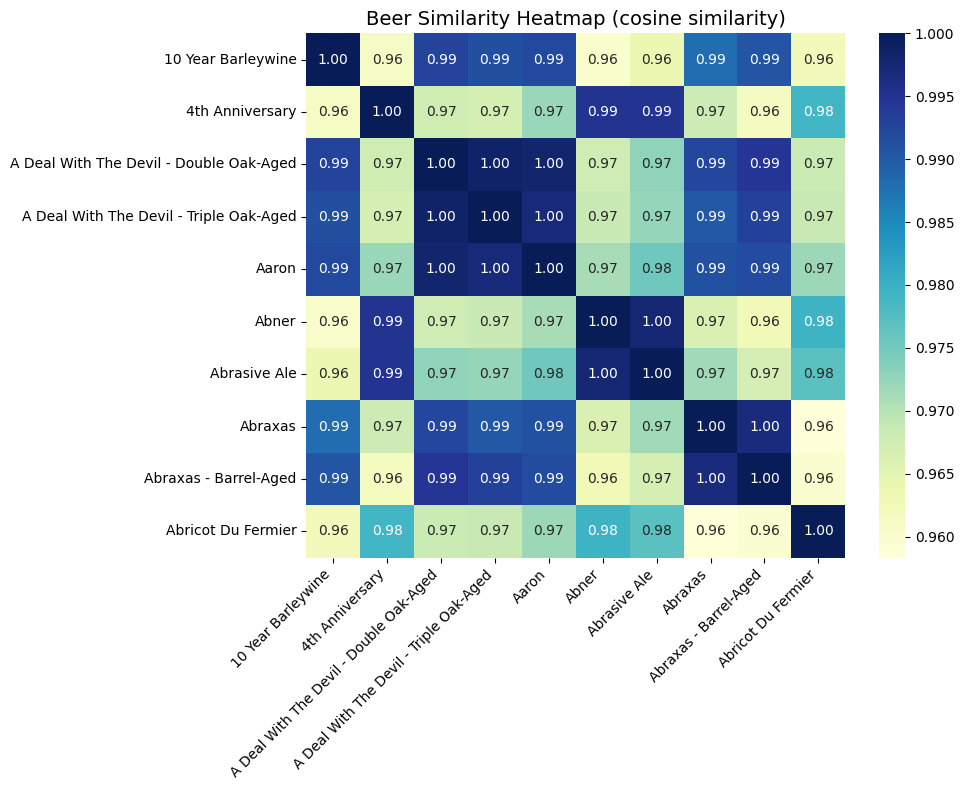

In [28]:
# ---------------------- Task F with Visualization ----------------------
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Pick any 10 beers (first 10 for reproducibility)
sample_beers = beers[:10]

# Step 2: Compute vectors for these beers
sample_tokens = [beer_tokens[beers.index(b)] for b in sample_beers]
sample_vecs = np.vstack([doc_vec(toks) for toks in sample_tokens])

# Step 3: Build similarity matrix
sim_matrix = cosine_similarity(sample_vecs)

# Step 4: Choose one beer as query (first in list)
query_beer = sample_beers[0]
query_idx = 0

# Step 5: Find most similar beer
sims = sim_matrix[query_idx].copy()
sims[query_idx] = -1  # exclude self
most_sim_idx = np.argmax(sims)
most_similar_beer = sample_beers[most_sim_idx]

print("Query Beer:", query_beer)
print("Most Similar Beer:", most_similar_beer)
print("Similarity Score:", round(sims[most_sim_idx], 3))

# Step 6: Create DataFrame for matrix
sim_df = pd.DataFrame(sim_matrix, index=sample_beers, columns=sample_beers)

# Step 7: Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            xticklabels=sample_beers, yticklabels=sample_beers)
plt.title("Beer Similarity Heatmap (cosine similarity)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Explanation:
Each beer is represented by the average of its review embeddings, which captures the semantic meaning of how drinkers describe its flavor, aroma, and body. To compare beers, we use cosine similarity, a measure that focuses on the angle between vectors rather than their magnitude, ensuring that beers are compared based on descriptive content rather than review length or count. Beers with high similarity scores share overlapping descriptive language; for example, two IPAs often characterized as “hoppy, citrus, bitter” will naturally cluster closer together than an IPA and a stout. This approach works effectively because word embeddings position semantically related words near each other (e.g., silky and smooth), and aggregating them across reviews produces a semantic fingerprint for each beer. Cosine similarity then provides a natural way to measure the closeness of these fingerprints, highlighting beers that are most alike in how they are perceived and described.

**Aha Moment** 
Fit over fame: Custom embeddings surfaced beers that weren’t always the highest-rated but best matched the attributes—proof that preference fit can beat overall popularity.